# CẤU TRÚC BÀI LÀM
<u>Nội dung</u>:
* Quan sát dữ liệu
* Tiền xử lý dữ liệu
* Xây dựng mô hình Machine Learning


## Tải thư viện cần sử dụng

In [ ]:
import pandas                     as pd
import seaborn                    as sns
import matplotlib.pyplot          as plt
import numpy                      as np
import gdown
import plotly.express             as px
import matplotlib.cm              as cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

## 1.Quan sát dữ liệu

In [ ]:
!gdown 1iCPQxJP1iMcKmM_qzKwQI_3ycRd-niTa

Downloading...
From: https://drive.google.com/uc?id=1iCPQxJP1iMcKmM_qzKwQI_3ycRd-niTa
To: /content/Mall_Customers.csv
100% 3.98k/3.98k [00:00<00:00, 17.5MB/s]


In [ ]:
mall = pd.read_csv(r"/content/Mall_Customers.csv")

In [ ]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


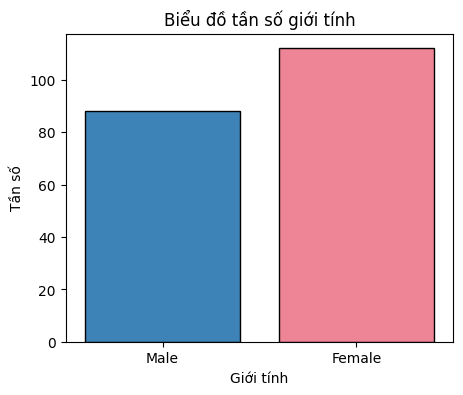

In [ ]:
# Biểu đồ phân phối giới tính
plt.figure(figsize=(5, 4))
sns.countplot(x='Gender', data=mall, palette={'Male': '#2986cc', 'Female': '#ff748c'}, edgecolor="k")
plt.title('Biểu đồ tần số giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Tần số')
plt.show()

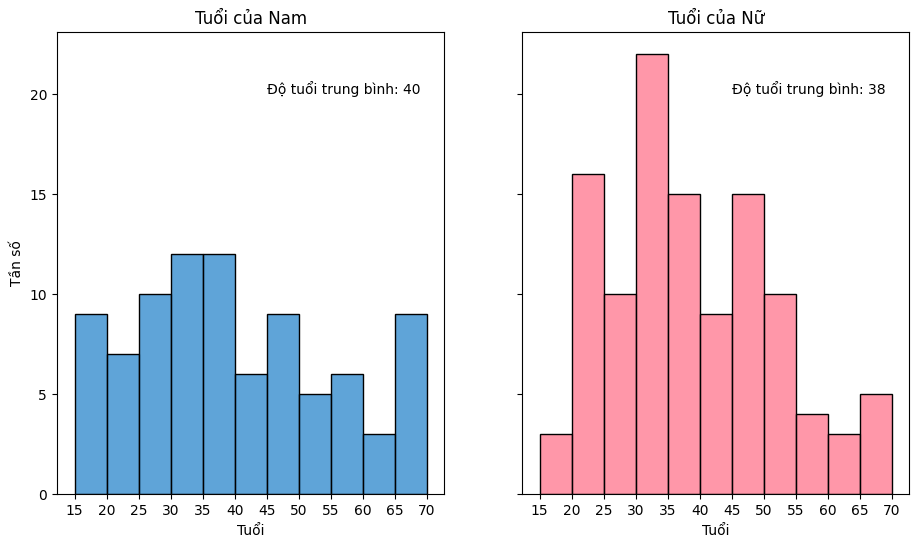

In [ ]:
# Dữ liệu tập hợp con cho nam và nữ
tuoi_nam = mall[mall['Gender'] == 'Male']['Age']
tuoi_nu = mall[mall['Gender'] == 'Female']['Age']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6), sharey=True)

# Biểu đồ phân phối độ tuổi theo giới tính
## Theo giới tính nam
sns.histplot(tuoi_nam, bins=range(15, 75, 5), kde=False, color='#2986cc', ax=ax1)
ax1.set(title='Tuổi của Nam', xlabel='Tuổi', ylabel='Tần số', xticks=range(15, 75, 5))
ax1.text(45,20, "Độ tuổi trung bình: {}".format(round(tuoi_nam.mean())))

## Theo giới tính nữ
sns.histplot(tuoi_nu, bins=range(15, 75, 5), kde=False, color='#ff748c', ax=ax2)
ax2.set(title='Tuổi của Nữ', xlabel='Tuổi', ylabel='Tần số', xticks=range(15, 75, 5))
ax2.text(45,20, "Độ tuổi trung bình: {}".format(round(tuoi_nu.mean())))

plt.show()

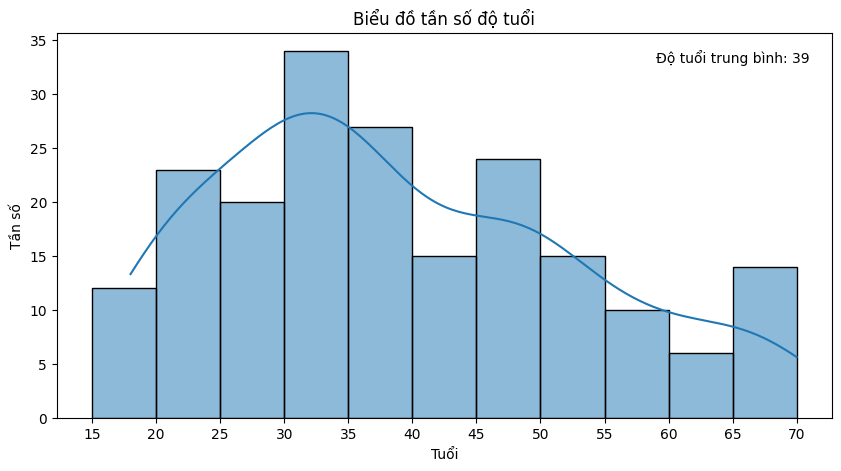

In [ ]:
# Biểu đồ phân phối tuổi của khách hàng
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', data=mall, bins=range(15, 75, 5), kde=True)
plt.title('Biểu đồ tần số độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tần số')
plt.xticks(range(15, 75, 5))
plt.text(59,33, "Độ tuổi trung bình: {}".format(round(mall['Age'].mean())))
plt.show()

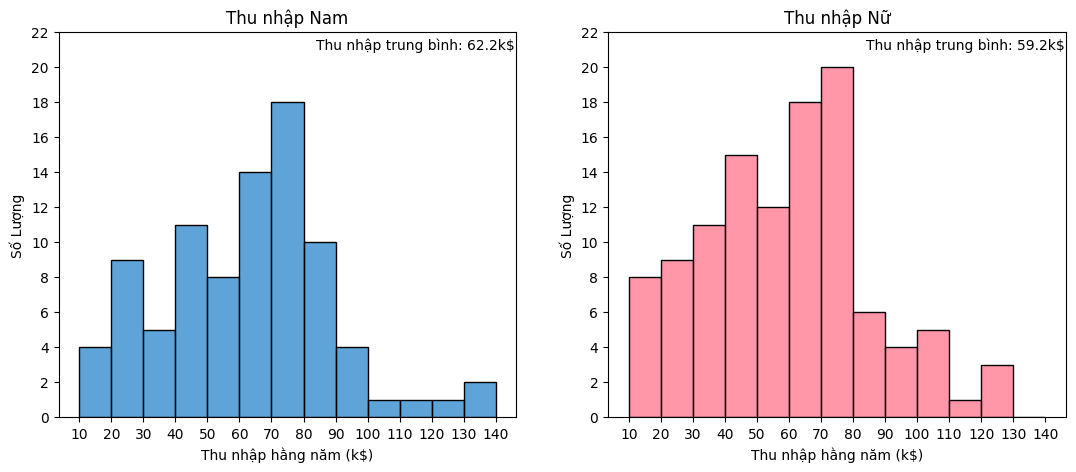

In [ ]:
# Chọn ra dữ liệu Thu nhập hàng năm theo giới tính
thunhap_nam = mall[mall['Gender'] == 'Male']['Annual Income (k$)']
thunhap_nu = mall[mall['Gender'] == 'Female']['Annual Income (k$)']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Biểu đồ phân phối thu nhập hàng năm theo giới tính
## Theo giới tính Nam
sns.histplot(thunhap_nam, bins=range(10, 150, 10), kde=False, color='#2986cc', ax=ax1)
ax1.set(xticks=range(10, 150, 10), yticks=range(0, 24, 2), ylim=(0, 22),
        title='Thu nhập Nam', xlabel='Thu nhập hằng năm (k$)', ylabel='Số Lượng')
ax1.text(84, 21, f"Thu nhập trung bình: {thunhap_nam.mean():.1f}k$")

## Theo giới tính Nữ
sns.histplot(thunhap_nu, bins=range(10, 150, 10), kde=False, color='#ff748c', ax=ax2)
ax2.set(xticks=range(10, 150, 10), yticks=range(0, 24, 2), ylim=(0, 22),
        title='Thu nhập Nữ', xlabel='Thu nhập hằng năm (k$)', ylabel='Số Lượng')
ax2.text(84, 21, f"Thu nhập trung bình: {thunhap_nu.mean():.1f}k$")

# Show the first plot
plt.show()

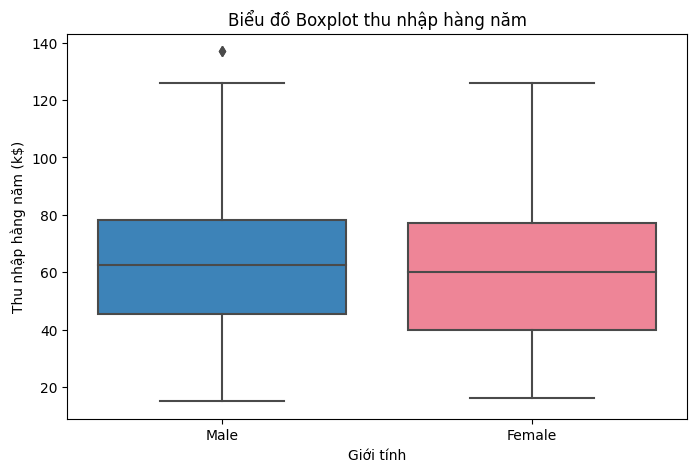

In [ ]:
## Boxplot biểu diễn thu nhập hàng nằm
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall, palette={'Male': '#2986cc', 'Female': '#ff748c'})
plt.xlabel('Giới tính')
plt.ylabel('Thu nhập hằng năm (k$)')
plt.title('Biểu đồ Boxplot thu nhập hàng năm')
plt.show()

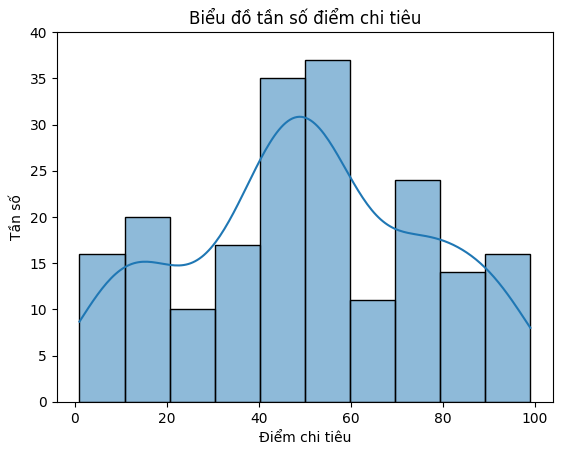

In [ ]:
sns.histplot(x='Spending Score (1-100)', data=mall, bins=10, kde=True)
plt.title('Biểu đồ tần số điểm chi tiêu')
plt.xlabel('Điểm chi tiêu')
plt.ylabel('Tần số')
plt.yticks(range(0,41,5))
plt.show()

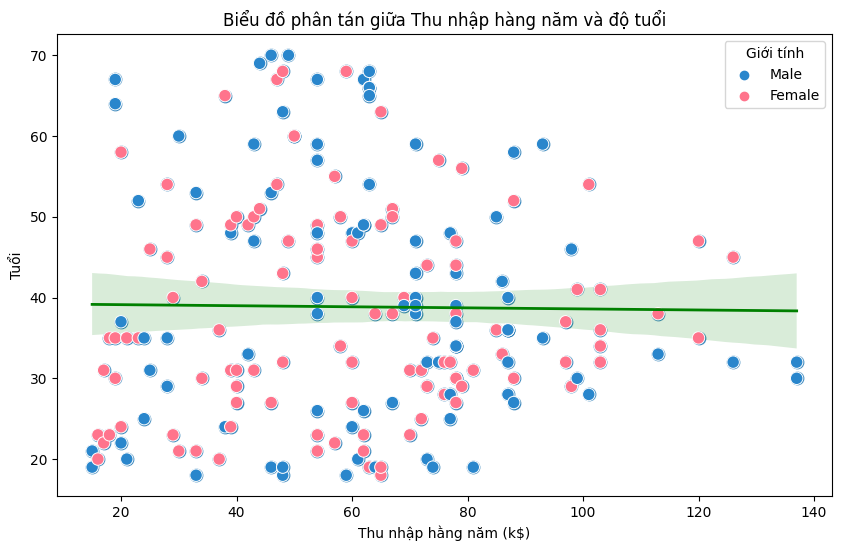

In [ ]:
# Biểu đồ phân tán giữa Thu nhập hàng năm và độ tuổi theo giới tính
plt.figure(figsize=(10, 6))

# Biểu đồ phân tán với đường hồi quy
sns.regplot(x='Annual Income (k$)', y='Age', data=mall, scatter_kws={'s': 80}, line_kws={'color': 'green', 'linewidth': 2})

sns.scatterplot(x='Annual Income (k$)', y='Age', data=mall, hue='Gender', palette={'Male': '#2986cc', 'Female': '#ff748c'}, s=80)

plt.title('Biểu đồ phân tán giữa Thu nhập hàng năm và độ tuổi')
plt.xlabel('Thu nhập hằng năm (k$)')
plt.ylabel('Tuổi')
plt.legend(title='Giới tính')
plt.show()

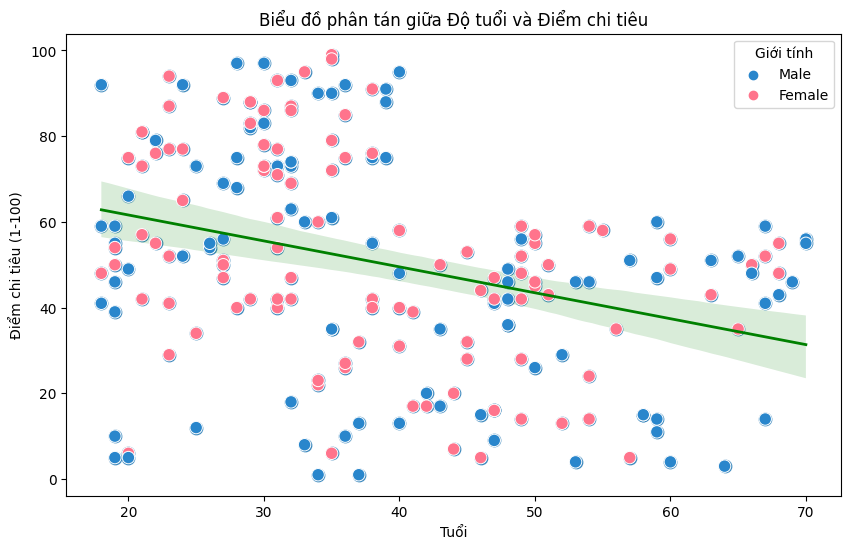

In [ ]:
# Biểu đồ phân tán giữa Độ tuổi và Điểm chi tiêu theo giới tính

plt.figure(figsize=(10, 6))

sns.regplot(x='Age', y='Spending Score (1-100)', data=mall, scatter_kws={'s': 80}, line_kws={'color': 'green', 'linewidth': 2})

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall, hue='Gender', palette={'Male': '#2986cc', 'Female': '#ff748c'}, s=80)

plt.title('Biểu đồ phân tán giữa Độ tuổi và Điểm chi tiêu')
plt.xlabel('Tuổi')
plt.ylabel('Điểm chi tiêu (1-100)')
plt.legend(title='Giới tính')
plt.show()

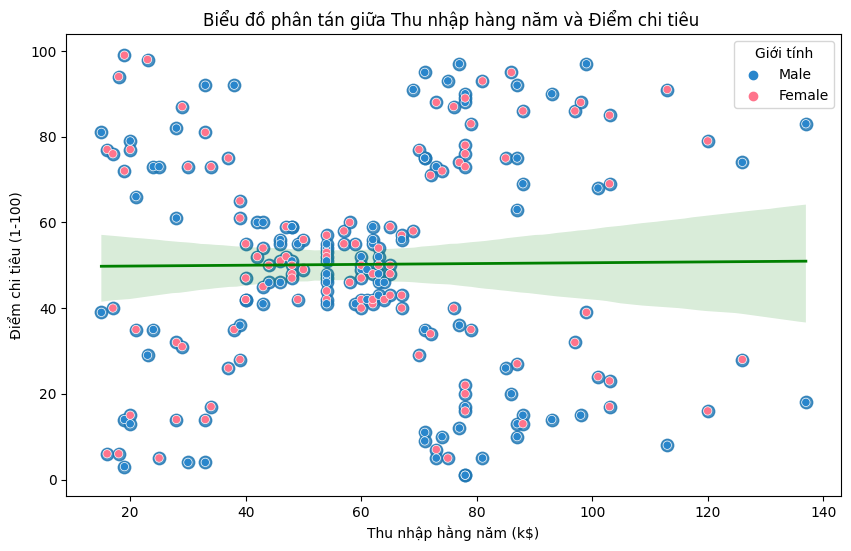

In [ ]:
# Biểu đồ phân tán giữa Thu nhập hàng năm và Điểm chi tiêu theo giới tính
plt.figure(figsize=(10, 6))

sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall, scatter_kws={'s': 80}, line_kws={'color': 'green', 'linewidth': 2})

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall, hue='Gender', palette={'Male': '#2986cc', 'Female': '#ff748c'})

plt.title('Biểu đồ phân tán giữa Thu nhập hàng năm và Điểm chi tiêu ')
plt.xlabel('Thu nhập hằng năm (k$)')
plt.ylabel('Điểm chi tiêu (1-100)')
plt.legend(title='Giới tính')
plt.show()

## 2.Tiền xử lý dữ liệu


#### 2.1. Kiểm tra dữ liệu bị thiếu

In [ ]:
mall.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 2.2. Kiểm tra những giá trị trùng lặp

In [ ]:
mall.duplicated().sum()

0

#### 2.3. Mã hoá nhị phân

In [ ]:
## Chuyển cột [Gender] về dạng nhị phân
mall = pd.get_dummies(mall, drop_first = True)
print(mall.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39            1
1           2   21                  15                      81            1
2           3   20                  16                       6            0
3           4   23                  16                      77            0
4           5   31                  17                      40            0


## 3.Xây dựng mô hình Máy học

In [ ]:
mall.drop('CustomerID', axis=1, inplace=True)

### 3.1 Tìm tham số tối ưu phù hợp với mô hình

#### Siêu tham số preference

In [ ]:
no_of_clusters = []
preferences = range(-20000,0,100)
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(mall)
    af_sil_score.append(silhouette_score(mall, AF.labels_))

af_results = pd.DataFrame([preferences, af_sil_score], index=['preference', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


,preference,sil_score
82,-11800.0,0.451356
27,-17300.0,0.451202
52,-14800.0,0.451202
55,-14500.0,0.451202
53,-14700.0,0.451202


### 3.2. Customer Segmentation ( Annual Income và Spending Score)

In [ ]:
income_score = mall[['Annual Income (k$)', 'Spending Score (1-100)']]

#### Xây dựng mô hình với tham số tối ưu

In [ ]:
AF = AffinityPropagation(preference=-11800, damping=0.5).fit(income_score)

In [ ]:
cluster_centers_indices = AF.cluster_centers_indices_

In [ ]:
AF_clustered = income_score.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

In [ ]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,21
1,22
2,83
3,39
4,35


#### Biểu diễn dữ liệu sau khi đã phân cụm

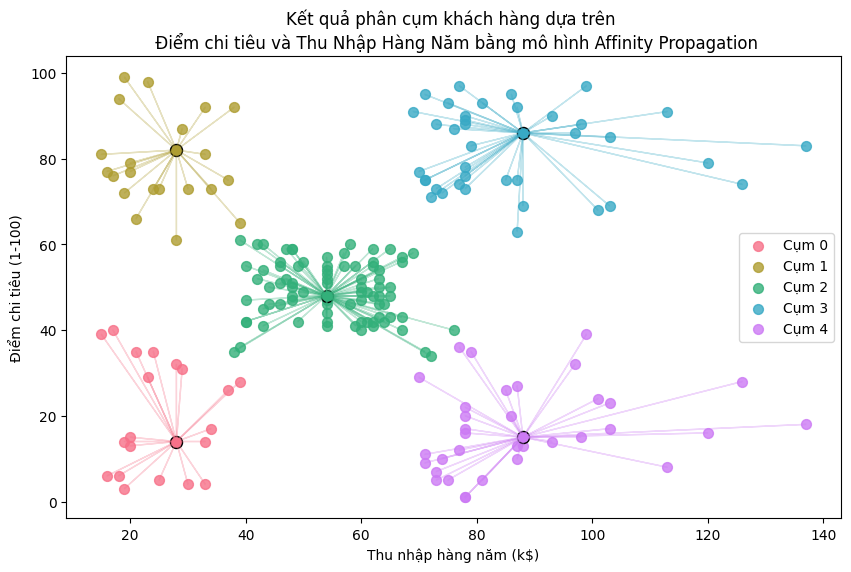

In [ ]:
import matplotlib.cm as cm
# Xác định bảng màu tùy chỉnh với các màu riêng biệt cho từng cụm
custom_palette = sns.color_palette("husl", n_colors=len(set(AF_clustered['Cluster'])))

# Tạo biểu đồ phân tán có mũi tên hướng về mẫu
plt.figure(figsize=(10, 6))
# Biểu đồ phân tán cho mỗi cụm
for cluster_label in set(AF_clustered['Cluster']):
    cluster_data = AF_clustered[AF_clustered['Cluster'] == cluster_label]

    # Tìm chỉ mục của mẫu (exemplar) cho mỗi cụm
    exemplar_index = cluster_centers_indices[cluster_label]

    # Biểu đồ phân tán cho các điểm không phải mẫu (non-exemplar)
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cụm {cluster_label}', s=50, alpha=0.8, color=custom_palette[cluster_label])

    # Biểu đồ phân tán cho các điểm là mẫu (exemplar)
    plt.scatter(AF_clustered.loc[exemplar_index, 'Annual Income (k$)'],
                AF_clustered.loc[exemplar_index, 'Spending Score (1-100)'],
                s=75, marker='o', edgecolor='black', linewidth=1, alpha=1, color=custom_palette[cluster_label])

    # Thêm mũi tên từ mỗi điểm không phải mẫu vào mẫu
    for _, row in cluster_data.iterrows():
        plt.arrow(row['Annual Income (k$)'], row['Spending Score (1-100)'],
                  AF_clustered.loc[exemplar_index, 'Annual Income (k$)'] - row['Annual Income (k$)'],
                  AF_clustered.loc[exemplar_index, 'Spending Score (1-100)'] - row['Spending Score (1-100)'],
                  head_width=0.5, head_length=0.5, fc=custom_palette[cluster_label], ec=custom_palette[cluster_label], alpha=0.3)

plt.xlabel('Thu nhập hàng năm (k$)')
plt.ylabel('Điểm chi tiêu (1-100)')
plt.title('Kết quả phân cụm khách hàng dựa trên \n Điểm chi tiêu và Thu Nhập Hàng Năm bằng mô hình Affinity Propagation')
plt.legend()
plt.show()


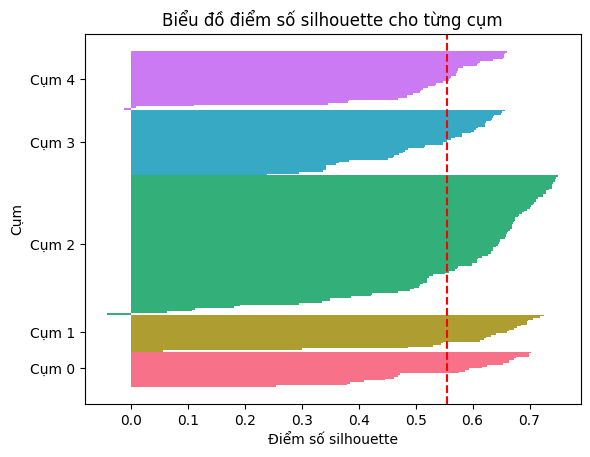

In [ ]:
# Tính toán điểm số silhouette cho mỗi điểm
silhouette_vals = silhouette_samples(AF_clustered.drop('Cluster', axis=1), AF_clustered['Cluster'])

# Thiết lập biểu đồ
y_ticks = []
y_lower, y_upper = 0, 0
n_clusters = len(set(AF_clustered['Cluster']))

for i, cluster in enumerate(set(AF_clustered['Cluster'])):
    cluster_silhouette_vals = silhouette_vals[AF_clustered['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1.0, color=custom_palette[cluster])
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

# Đánh dấu điểm số silhouette trung bình
silhouette_avg = silhouette_score(AF_clustered.drop('Cluster', axis=1), AF_clustered['Cluster'])
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, [f'Cụm {c}' for c in set(AF_clustered['Cluster'])])
plt.ylabel('Cụm')
plt.xlabel('Điểm số silhouette')
plt.title('Biểu đồ điểm số silhouette cho từng cụm')
plt.show()


In [ ]:
print(f"Chỉ số Silhouette: {silhouette_avg}")

Chỉ số Silhouette: 0.5546558945017905


### 3.3. Customer Segmentation ( Age và Spending Score)


In [ ]:
age_score = mall[['Age', 'Spending Score (1-100)']]

#### Xây dựng mô hình với tham số tối ưu

In [ ]:
AF = AffinityPropagation(preference=-11800, damping=0.5).fit(age_score)

In [ ]:
cluster_centers_indices = AF.cluster_centers_indices_

In [ ]:
AF_clustered = age_score.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

In [ ]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,47
1,47
2,49
3,57


#### Biểu diễn dữ liệu sau khi đã phân cụm

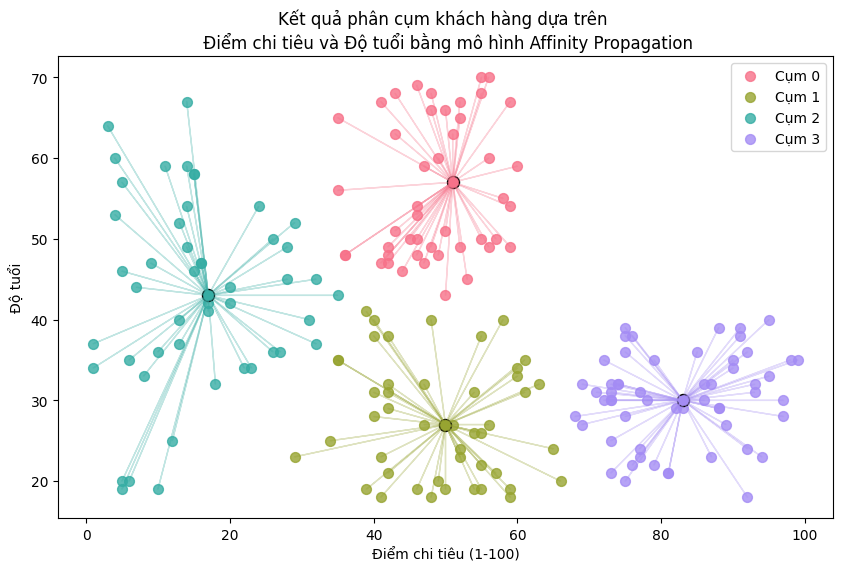

In [ ]:
import matplotlib.cm as cm
# Xác định bảng màu tùy chỉnh với các màu riêng biệt cho từng cụm
custom_palette = sns.color_palette("husl", n_colors=len(set(AF_clustered['Cluster'])))

# Tạo biểu đồ phân tán có mũi tên hướng về mẫu
plt.figure(figsize=(10, 6))
# Biểu đồ phân tán cho mỗi cụm
for cluster_label in set(AF_clustered['Cluster']):
    cluster_data = AF_clustered[AF_clustered['Cluster'] == cluster_label]

    # Tìm chỉ mục của mẫu (exemplar) cho mỗi cụm
    exemplar_index = cluster_centers_indices[cluster_label]

    # Biểu đồ phân tán cho các điểm không phải mẫu (non-exemplar)
    plt.scatter( cluster_data['Spending Score (1-100)'], cluster_data['Age'],
                label=f'Cụm {cluster_label}', s=50, alpha=0.8, color=custom_palette[cluster_label])

    # Biểu đồ phân tán cho các điểm là mẫu (exemplar)
    plt.scatter(AF_clustered.loc[exemplar_index, 'Spending Score (1-100)'],
                AF_clustered.loc[exemplar_index, 'Age'],
                s=75, marker='o', edgecolor='black', linewidth=1, alpha=1, color=custom_palette[cluster_label])

    # Thêm mũi tên từ mỗi điểm không phải mẫu vào mẫu
    for _, row in cluster_data.iterrows():
        plt.arrow(row['Spending Score (1-100)'], row['Age'],
                  AF_clustered.loc[exemplar_index, 'Spending Score (1-100)'] - row['Spending Score (1-100)'],
                  AF_clustered.loc[exemplar_index, 'Age'] - row['Age'],
                  head_width=0.5, head_length=0.5, fc=custom_palette[cluster_label], ec=custom_palette[cluster_label], alpha=0.3)
plt.xlabel('Điểm chi tiêu (1-100)')
plt.ylabel('Độ tuổi')
plt.title('Kết quả phân cụm khách hàng dựa trên \n Điểm chi tiêu và Độ tuổi bằng mô hình Affinity Propagation')
plt.legend()
plt.show()


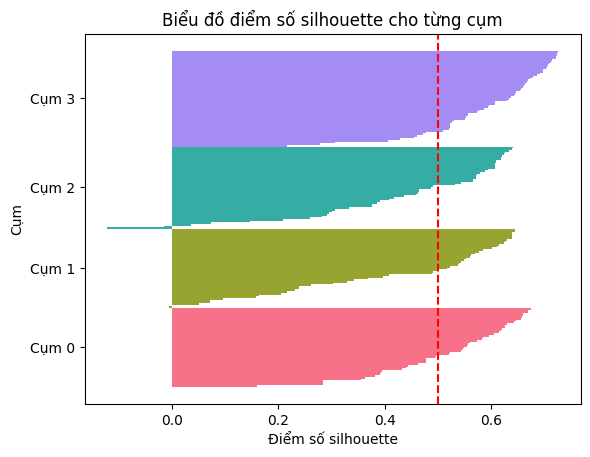

In [ ]:
# Tính toán điểm số silhouette cho mỗi điểm
silhouette_vals = silhouette_samples(AF_clustered.drop('Cluster', axis=1), AF_clustered['Cluster'])

# Thiết lập biểu đồ
y_ticks = []
y_lower, y_upper = 0, 0
n_clusters = len(set(AF_clustered['Cluster']))

for i, cluster in enumerate(set(AF_clustered['Cluster'])):
    cluster_silhouette_vals = silhouette_vals[AF_clustered['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1.0, color=custom_palette[cluster])
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

# Đánh dấu điểm số silhouette trung bình
silhouette_avg = silhouette_score(AF_clustered.drop('Cluster', axis=1), AF_clustered['Cluster'])
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, [f'Cụm {c}' for c in set(AF_clustered['Cluster'])])
plt.ylabel('Cụm')
plt.xlabel('Điểm số silhouette')
plt.title('Biểu đồ điểm số silhouette cho từng cụm')
plt.show()


In [ ]:
print(f"Chỉ số Silhouette: {silhouette_avg}")

Chỉ số Silhouette: 0.4998823829214718


### 3.4 Customer Segmentation (Age, Spending Score và Annual Income)

In [ ]:
segment_3d = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#### Xây dựng mô hình với tham số tối ưu

In [ ]:
AF = AffinityPropagation(preference=-11800, damping=0.5).fit(segment_3d)

In [ ]:
cluster_centers_indices = AF.cluster_centers_indices_

In [ ]:
AF_clustered = segment_3d.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

In [ ]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


#### Biểu diễn dữ liệu sau khi phân cụm

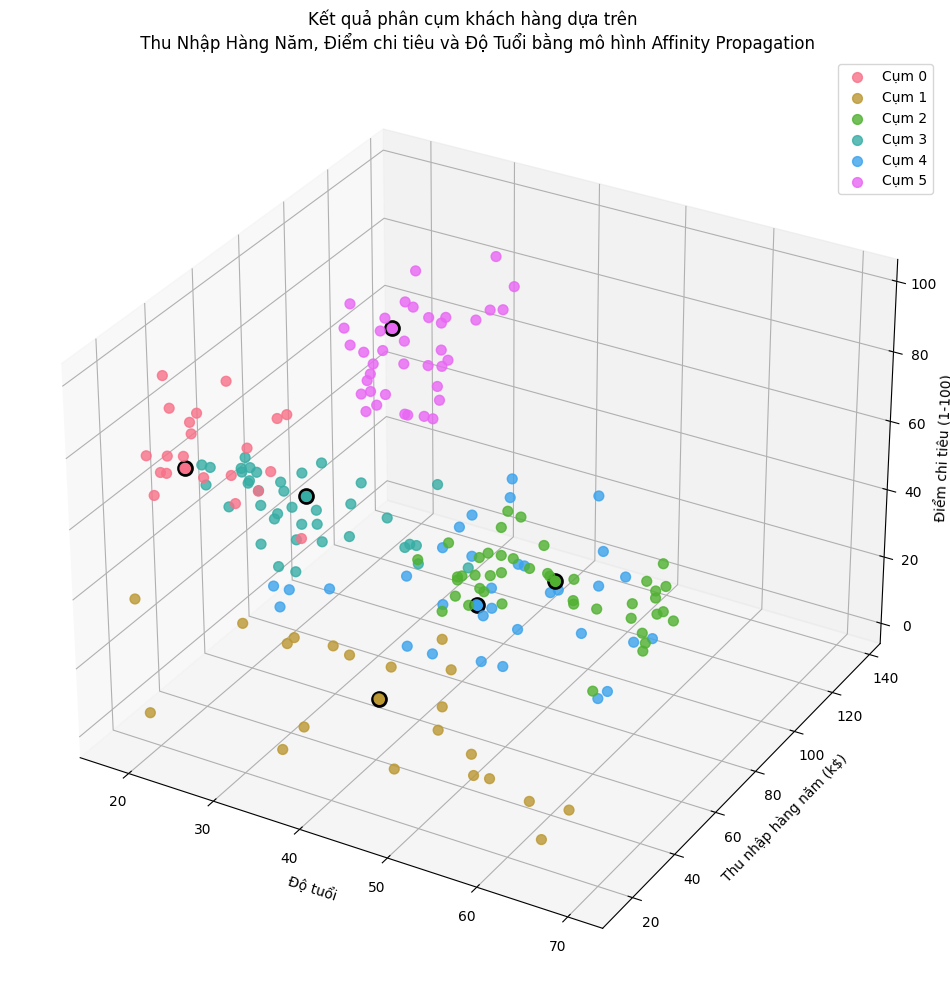

In [ ]:
custom_palette = sns.color_palette("husl", n_colors=len(set(AF_clustered['Cluster'])))

# Tạo biểu đồ phân tán 3D
fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

# Biểu đồ phân tán cho mỗi cụm
for cluster_label in set(AF_clustered['Cluster']):
    cluster_data = AF_clustered[AF_clustered['Cluster'] == cluster_label]

    # Tìm chỉ mục của exemplar cho mỗi cụm
    exemplar_index = cluster_centers_indices[cluster_label]

    # Biểu đồ phân tán cho các điểm không phải mẫu (non-exemplar)
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cụm {cluster_label}', s=50, alpha=0.8, color=custom_palette[cluster_label])

    # Biểu đồ phân tán cho các điểm là mẫu (exemplar), các điểm mẫu sẽ lớn hơn một chút và có đường viền đen
    ax.scatter(AF_clustered.loc[exemplar_index, 'Age'],
               AF_clustered.loc[exemplar_index, 'Annual Income (k$)'],
               AF_clustered.loc[exemplar_index, 'Spending Score (1-100)'],
               s=100, marker='o', edgecolor='black', linewidth=2, alpha=1, color=custom_palette[cluster_label])

ax.set_xlabel('Độ tuổi')
ax.set_ylabel('Thu nhập hàng năm (k$)')
ax.set_zlabel('Điểm chi tiêu (1-100)')
ax.set_title('Kết quả phân cụm khách hàng dựa trên \n Thu Nhập Hàng Năm, Điểm chi tiêu và Độ Tuổi bằng mô hình Affinity Propagation')

plt.legend()
plt.show()


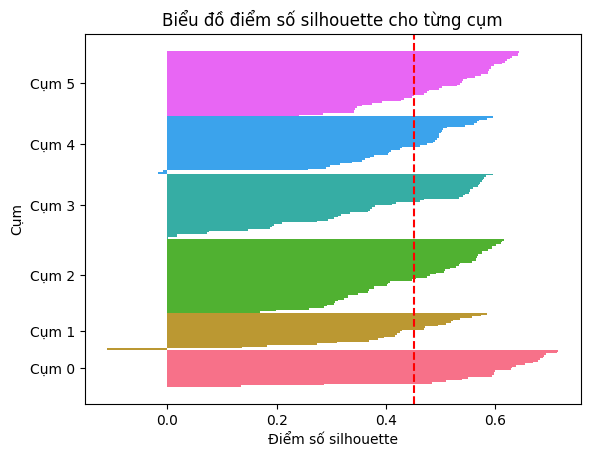

In [ ]:
# Tính toán điểm số silhouette cho mỗi điểm
silhouette_vals = silhouette_samples(AF_clustered.drop('Cluster', axis=1), AF_clustered['Cluster'])

# Thiết lập biểu đồ
y_ticks = []
y_lower, y_upper = 0, 0
n_clusters = len(set(AF_clustered['Cluster']))

for i, cluster in enumerate(set(AF_clustered['Cluster'])):
    cluster_silhouette_vals = silhouette_vals[AF_clustered['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1.0, color=custom_palette[cluster])
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

# Đánh dấu điểm số silhouette trung bình
silhouette_avg = silhouette_score(AF_clustered.drop('Cluster', axis=1), AF_clustered['Cluster'])
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, [f'Cụm {c}' for c in set(AF_clustered['Cluster'])])
plt.ylabel('Cụm')
plt.xlabel('Điểm số silhouette')
plt.title('Biểu đồ điểm số silhouette cho từng cụm')
plt.show()


In [ ]:
print(f"Chỉ số Silhouette: {silhouette_avg}")

Chỉ số Silhouette: 0.4516490888773576


In [ ]:
# Tạo cột màu tùy chỉnh trong DataFrame
fig = px.scatter_3d(AF_clustered, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='Cluster', size_max=10, opacity=1
                    , title='Kết quả phân cụm khách hàng dựa trên Thu Nhập Hàng Năm, Điểm chi tiêu và Độ Tuổi bằng mô hình Affinity Propagation', height=1000, width=1000)


fig.update_traces(selector=dict(type='scatter3d', mode='markers'), marker=dict(line=dict(color='black', width=2)))

fig.show()

## 4.So sánh với các mô hình khác

#### 4.1. Segmentation theo Annual Income và Spending Score

In [ ]:
X1 = mall[['Annual Income (k$)' ,'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

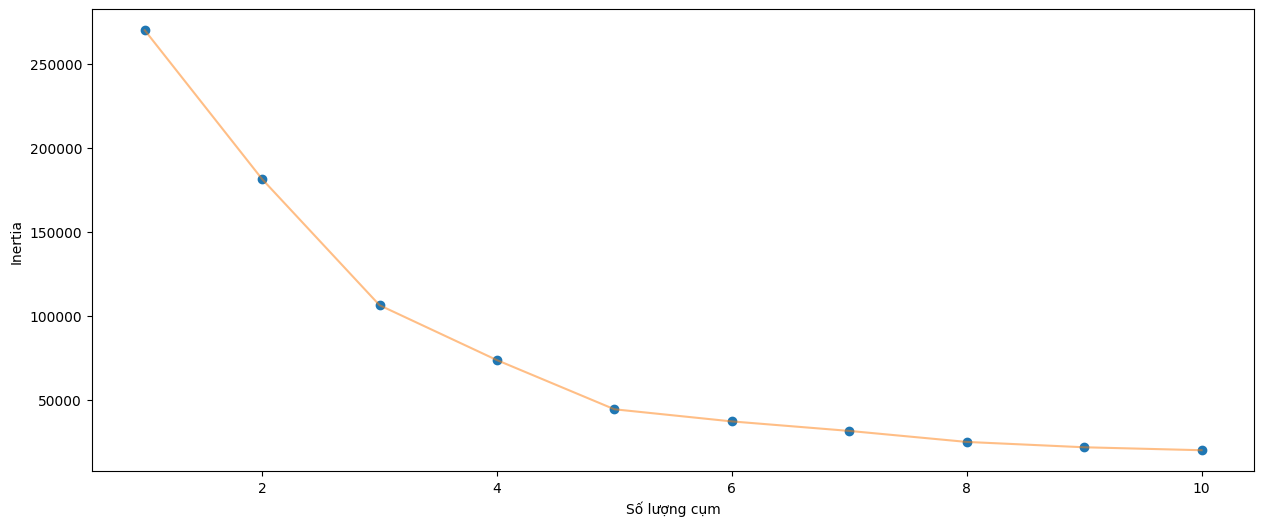

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Số lượng cụm') , plt.ylabel('Inertia')
plt.show()

In [ ]:
KM = (KMeans(n_clusters = 5))
KM.fit(X1)
centroids = KM.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
KM_clustered = mall.copy()
KM_clustered.loc[:,'Cluster'] = KM.labels_

In [ ]:
KM_clustered_size = KM_clustered.groupby('Cluster').size().to_frame()
KM_clustered_size.columns = ["AF_size"]
KM_clustered_size

,AF_size
Cluster,
0,81
1,22
2,39
3,23
4,35


In [ ]:
silhouette_avg = silhouette_score(KM_clustered.drop('Cluster', axis=1), KM_clustered['Cluster'])
print(f"Chỉ số Silhouette: {silhouette_avg}")

Chỉ số Silhouette: 0.44512364854575975


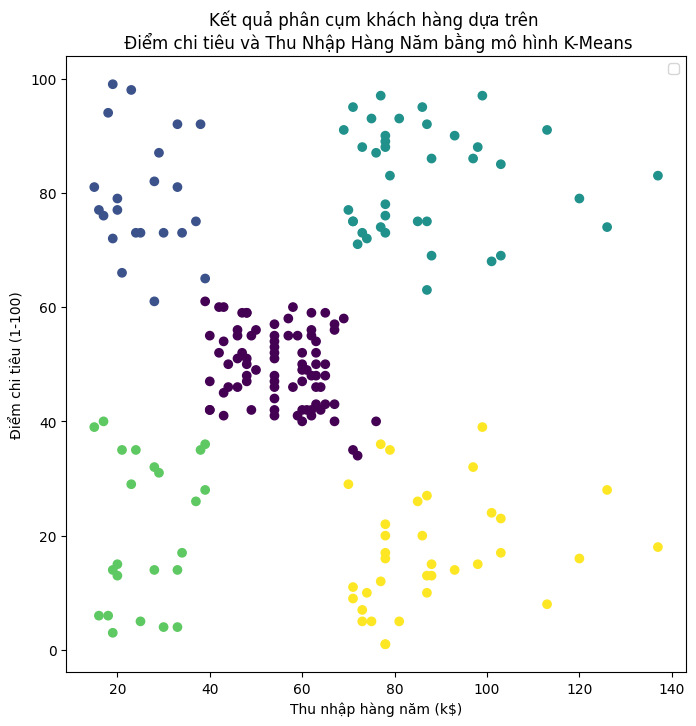

In [ ]:
custom_palette = sns.color_palette("husl", n_colors=len(set(KM_clustered['Cluster'])))

## Biểu diễn trực quan
plt.figure(figsize = (8, 8))
plt.scatter( KM_clustered['Annual Income (k$)'],KM_clustered['Spending Score (1-100)']
            , c = KM_clustered.Cluster)

plt.xlabel('Thu nhập hàng năm (k$)')
plt.ylabel('Điểm chi tiêu (1-100)')
plt.title('Kết quả phân cụm khách hàng dựa trên \n Điểm chi tiêu và Thu Nhập Hàng Năm bằng mô hình K-Means')
plt.legend()
plt.show()

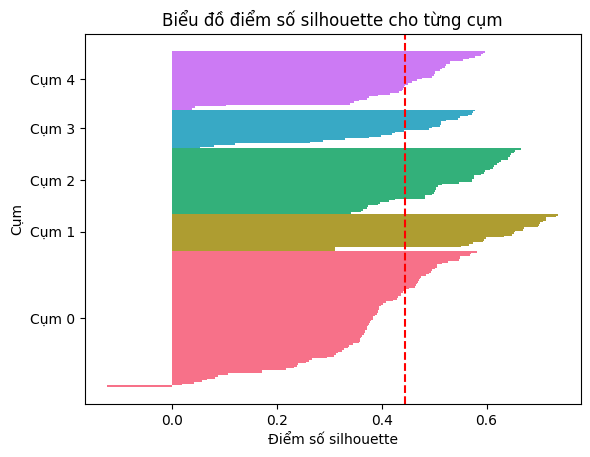

In [ ]:
# Tính toán điểm số silhouette cho mỗi điểm
silhouette_vals = silhouette_samples(KM_clustered.drop('Cluster', axis=1), KM_clustered['Cluster'])

# Thiết lập biểu đồ
y_ticks = []
y_lower, y_upper = 0, 0
n_clusters = len(set(KM_clustered['Cluster']))

for i, cluster in enumerate(set(KM_clustered['Cluster'])):
    cluster_silhouette_vals = silhouette_vals[KM_clustered['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1.0, color=custom_palette[cluster])
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

# Đánh dấu điểm số silhouette trung bình
silhouette_avg = silhouette_score(KM_clustered.drop('Cluster', axis=1), KM_clustered['Cluster'])
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, [f'Cụm {c}' for c in set(KM_clustered['Cluster'])])
plt.ylabel('Cụm')
plt.xlabel('Điểm số silhouette')
plt.title('Biểu đồ điểm số silhouette cho từng cụm')
plt.show()

#### 4.2. Segmentation theo Age và Spending Score

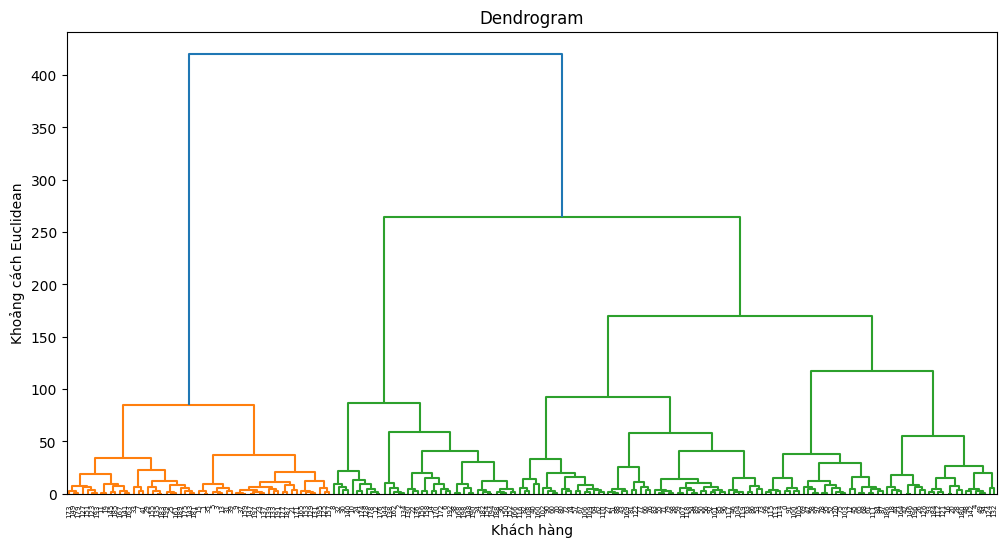

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Đọc dữ liệu
# Lựa chọn các thuộc tính cần phân cụm
X2 = mall[['Age', 'Spending Score (1-100)']]

# Xây dựng dendrogram để xác định số lượng cụm tối ưu
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X2, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Khách hàng')
plt.ylabel('Khoảng cách Euclidean')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

<ipython-input-53-44d38a96f618>:16: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



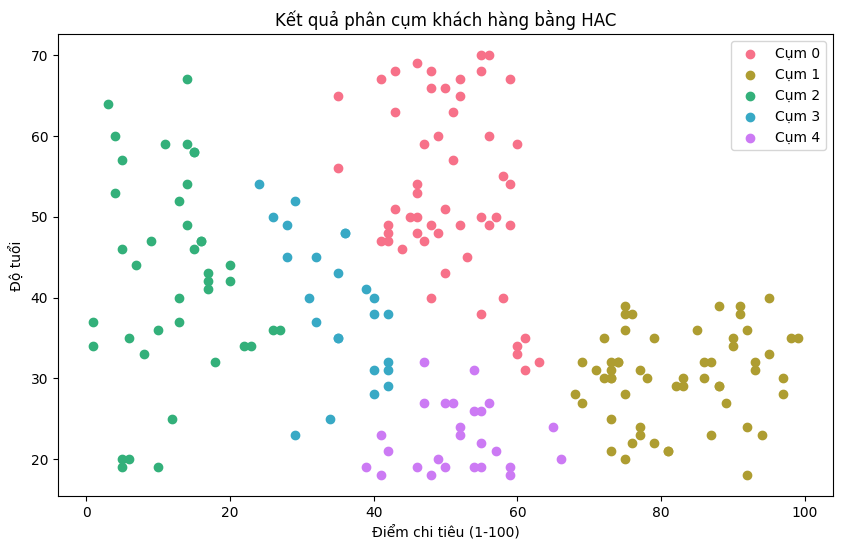

In [ ]:

# Xây dựng mô hình HAC với số cụm tối ưu
n_clusters = 5  # Số lượng cụm tối ưu dựa trên dendrogram
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

# Thực hiện phân cụm
clusters = model.fit_predict(X2)

# Thêm cột Cluster vào dữ liệu gốc để lưu kết quả phân cụm
X2['Cluster'] = clusters

custom_palette = sns.color_palette("husl", n_colors=len(set(X2['Cluster'])))

# Biểu diễn trực quan kết quả
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(X2[X2['Cluster'] == cluster]['Spending Score (1-100)'],
                X2[X2['Cluster'] == cluster]['Age'],
                label=f'Cụm {cluster}', c= custom_palette[cluster])
plt.xlabel('Điểm chi tiêu (1-100)')
plt.ylabel('Độ tuổi')
plt.title('Kết quả phân cụm khách hàng bằng HAC')
plt.legend()
plt.show()

In [ ]:
HAC_sizes = X2.groupby('Cluster').size().to_frame()
HAC_sizes.columns = ["HAC_size"]
HAC_sizes

,HAC_size
Cluster,
0,53
1,57
2,40
3,24
4,26


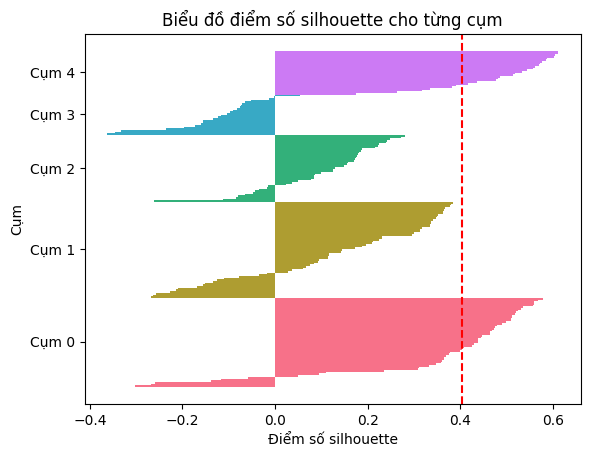

In [ ]:

# Tính toán điểm số silhouette cho mỗi điểm
silhouette_vals = silhouette_samples(KM_clustered.drop('Cluster', axis=1), X2['Cluster'])

# Thiết lập biểu đồ
y_ticks = []
y_lower, y_upper = 0, 0
n_clusters = len(set(X2['Cluster']))

for i, cluster in enumerate(set(X2['Cluster'])):
    cluster_silhouette_vals = silhouette_vals[X2['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1.0, color=custom_palette[cluster])
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

# Đánh dấu điểm số silhouette trung bình
silhouette_avg = silhouette_score(X2.drop('Cluster', axis=1), X2['Cluster'])
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, [f'Cụm {c}' for c in set(X2['Cluster'])])
plt.ylabel('Cụm')
plt.xlabel('Điểm số silhouette')
plt.title('Biểu đồ điểm số silhouette cho từng cụm')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X2.drop('Cluster', axis=1), X2['Cluster'])
print(f"Chỉ số Silhouette: {silhouette_avg}")

Chỉ số Silhouette: 0.40374071753059787
